# 1. Introduction

The goal of this project is to predict whether a patient has back pain or not. Since the thing we are predicting is binary variable, I'll predict it using logistic regression. Before that let's get to know our data a little bit better.

# 2. Exploratory data analysis


In [2]:
#importing librares

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing data
df = pd.read_csv("Dataset_spine.csv")

In [4]:
#size of dataset
df.shape

(310, 14)

In [5]:
#checking 3 random entries of data
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [6]:
# analysis of numeric data
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [7]:
# class distribution in the Class_att
df["Class_att"].value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

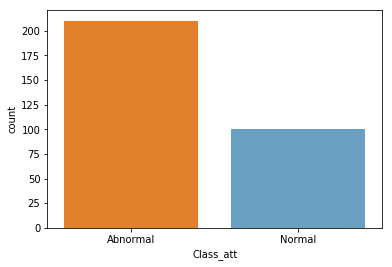

In [8]:
clrs = ["#ff7f0e", "#5aa2cf"]
sns.countplot(x=df["Class_att"],palette=clrs)

In [9]:
# checking the sum of Nan values in each column
df.isnull().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

In [10]:
# deleting the last column since allmost all entries are invalid
df.drop("Unnamed: 13",axis=1,inplace=True)

In [11]:
# making sure that the droping was complete
df.head(1)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.2544,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal


## 2.1. Correlation

Top three correlated features:
 - Col1 and Col4
 - Col1 and Col3
 - Col1 and Col6

In [12]:
correlation_matrix = df.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

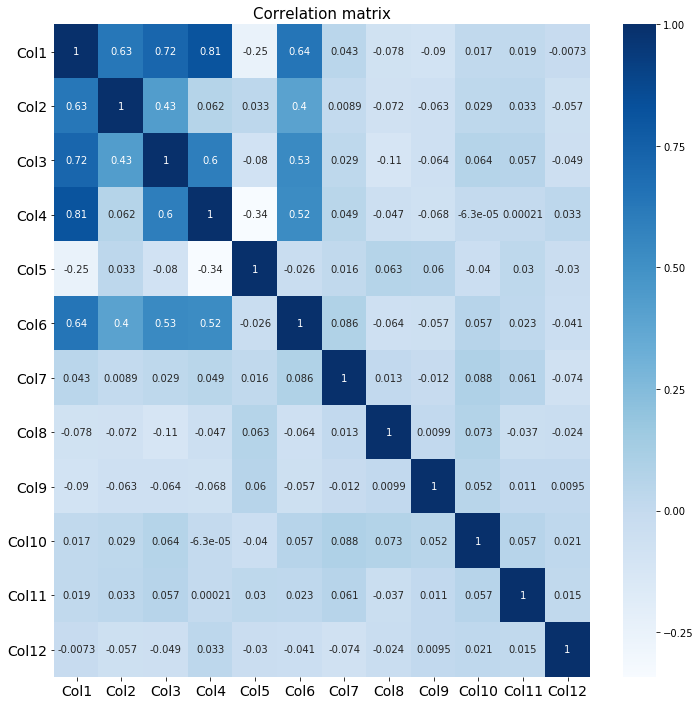

In [13]:
plt.figure(figsize = (12,12))
plt.title("Correlation matrix",fontsize = 15)
sns.heatmap(data = correlation_matrix,annot = True,cmap = "Blues")
plt.yticks(rotation = 0,fontsize = 14)
plt.xticks(fontsize = 14)

## 2.2. Features distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028FBA87CCC0>,
      dtype=object)

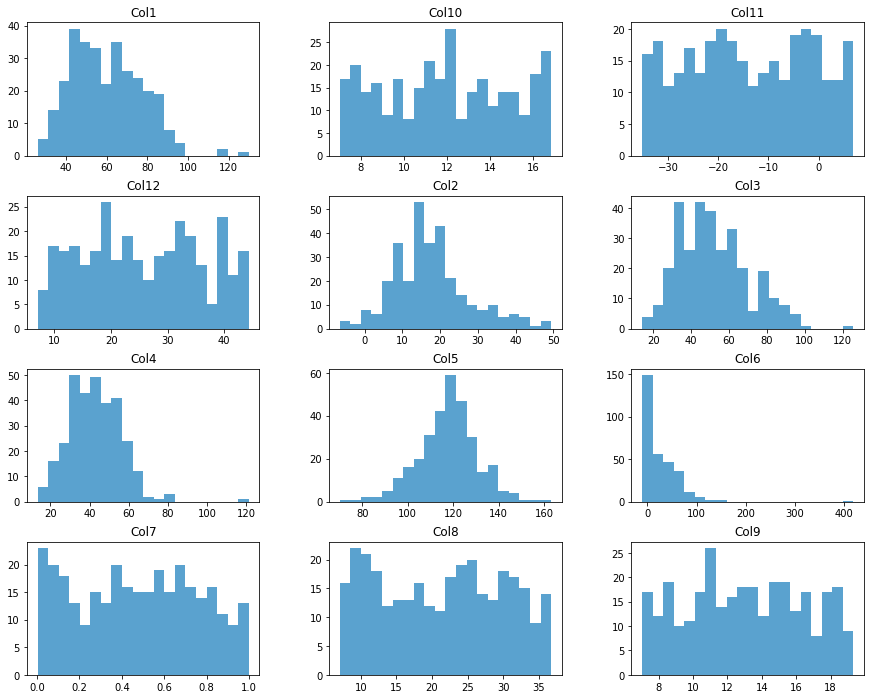

In [14]:
df.hist(figsize=(15,12),bins = 20,color="#5aa2cf",grid = False)

---

## 2.3. Top 3 correlated features scatter plot

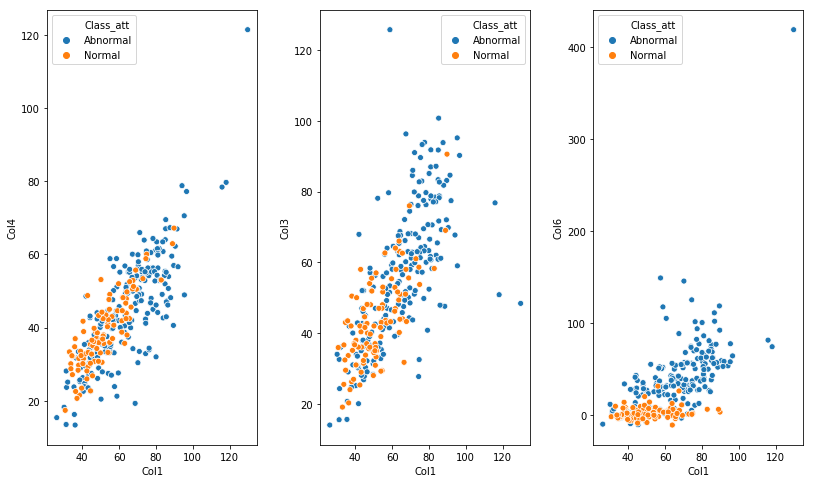

In [15]:
plt.figure(figsize = (12,8))
plt.subplots_adjust(right = 1,wspace = 0.3,hspace = 0.4)

plt.subplot(131)
sns.scatterplot(x=df.Col1,y=df.Col4,hue=df["Class_att"])


plt.subplot(132)
sns.scatterplot(x = df.Col1,y = df.Col3,hue=df["Class_att"])

plt.subplot(133)
sns.scatterplot(x = df.Col1,y = df.Col6,hue=df["Class_att"])


---

## 2.4. Outliers
I chose to leave outliers as they are, since there are many of them, deleting the may produce some wrong assumptions.

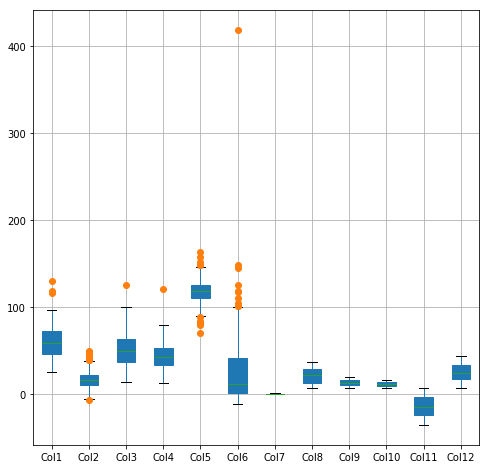

In [16]:
plt.figure(figsize = (8,8))
df.boxplot(patch_artist=True,sym="#ff7f0e")

# 3. Logistic regression

In [17]:
#importing ML alghoritms

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [18]:
X = df.drop('Class_att',axis=1) #input is all numeric values
y = df['Class_att'] #output (what we are predicting) is the categorical column "Class_att"

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
#training the model

log_model = LogisticRegression()
log_model.fit(X_train,y_train) 
prediction = log_model.predict(X_test)

In [24]:
pd.DataFrame(confusion_matrix(y_test,prediction))

,0,1
0,60,9
1,4,20


In [22]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

   Abnormal       0.94      0.87      0.90        69
     Normal       0.69      0.83      0.75        24

avg / total       0.87      0.86      0.86        93

